<a href="https://colab.research.google.com/github/Mathindata/WaterLevelPredictio/blob/master/Compound_Event_Modeling_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's upload the dataset ('location_1.csv')

In [ ]:
import pandas as pd 
import io 
  
from google.colab import files   
uploaded = files.upload()



Saving location_1.csv to location_1.csv


In [ ]:
import pandas as pd 
import io 

data = pd.read_csv('location_1.csv') 

data.describe()

,Unnamed: 0,pcp,flow,skew_surge,TWL
count,15921.000000,15921.000000,15921.000000,15921.000000,15921.000000
mean,7961.000000,4.332270,6.836027,0.051008,1.738175
std,4596.141153,9.587942,5.687872,0.131838,0.192278
min,1.000000,0.000000,0.176000,-0.625000,1.060000
25%,3981.000000,0.000000,2.800000,-0.033000,1.606000
50%,7961.000000,0.300000,5.320000,0.042000,1.726000
75%,11941.000000,3.500000,9.090000,0.123000,1.860000
max,15921.000000,192.000000,54.800000,1.012000,2.804000


In [ ]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
Original_data = data

In [ ]:
import numpy as np

TWL = np.array(data.TWL)

danger = [1 if x>0.85*TWL.max() else 0 for x in TWL]

Let's see when Total Water Level (TWL) raise to 0.85 percent of the max in the dataset.

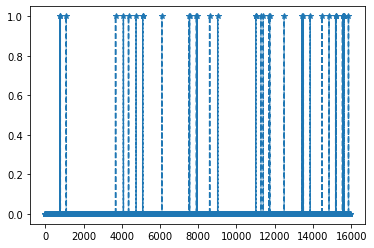

In [ ]:
import matplotlib.pyplot as plt
plt.plot(danger,'--*')

In [ ]:
#data = Original_data

# Graphs and Data Visualization

In [ ]:
data_vis = data

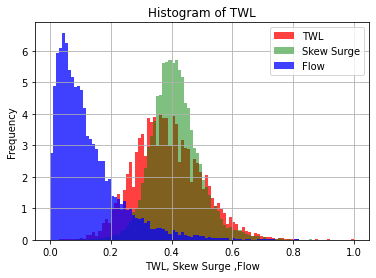

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv('location_1.csv') 
data =(data-data.min())/(data.max()-data.min())
#data=(data-data.mean())/data.std()
# the histogram of the data
n1, bins1, patches3 = plt.hist(data.TWL, 100, density=True, facecolor='r', alpha=0.750)
#n, bins, patches = plt.hist(data.pcp, 100, density=True, facecolor='b', alpha=0.750)
n2, bins2, patches3 = plt.hist(data.skew_surge, 100, density=True, facecolor='g', alpha=0.50)
n3, bins3, patches3 = plt.hist(data.flow, 100, density=True, facecolor='b', alpha=0.750)

plt.xlabel('TWL, Skew Surge ,Flow')
plt.ylabel('Frequency')
plt.title('Histogram of TWL')
#plt.xlim([-0.5,15])
#plt.ylim([0,4])
plt.grid(True)
plt.legend(['TWL', 'Skew Surge' ,'Flow'])
plt.show()

Precipitation seems to have a Pareto like distribuition. 

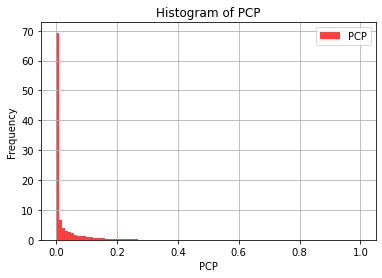

In [ ]:
n, bins, patches = plt.hist(data.pcp, 100, density=True, facecolor='red', alpha=0.75)

plt.xlabel('PCP')
plt.ylabel('Frequency')
plt.title('Histogram of PCP')

plt.grid(True)
plt.legend(['PCP'])
plt.show()

[Power-law Distributions in Empirical Data](http://tuvalu.santafe.edu/~aaronc/powerlaws/)

In [ ]:
 ! pip install powerlaw 

In [ ]:
import powerlaw

fit = powerlaw.Fit(data.pcp+.001)

alpha = fit.power_law.alpha

sigma = fit.power_law.sigma

#fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


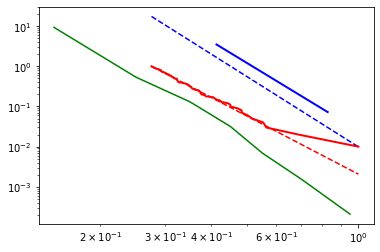

In [ ]:
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)
powerlaw.plot_pdf(np.array(data.pcp+.1), color='g',linestyle='-', ax=fig2)

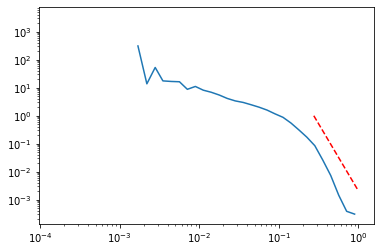

In [ ]:
fig3 = powerlaw.plot_pdf(np.array(data.pcp+.0001))
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig3)

# Quantizing TWL to fewer levels (8) for better visualization

In [ ]:
from sklearn import cluster
import numpy as np

n_clusters = 8
np.random.seed(42)
X = np.array(data_vis.TWL)
#X = (X-X.mean())/X.std()
X = X.reshape((-1, 1))  # We need an (n_sample, n_feature) array
#X = np.exp(X)
k_means = cluster.KMeans(n_clusters=n_clusters,)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
X_ompressed = np.choose(labels, values)
# X_ompressed = np.log(X_ompressed)
data_vis.TWL = X_ompressed

Comparing quantized and original TWL data

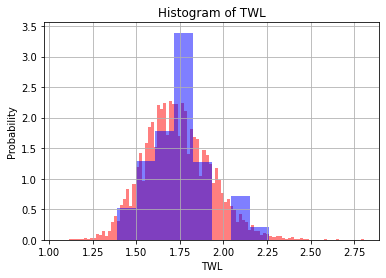

In [ ]:
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(X, 100, density=True, facecolor='r', alpha=0.50)
n, bins, patches = plt.hist(X_ompressed, n_clusters, density=True, facecolor='b', alpha=0.50)

plt.xlabel('TWL')
plt.ylabel('Probability')
plt.title('Histogram of TWL')

plt.grid(True)
plt.show()

Pink-purple color in the following graph shows the high water level

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


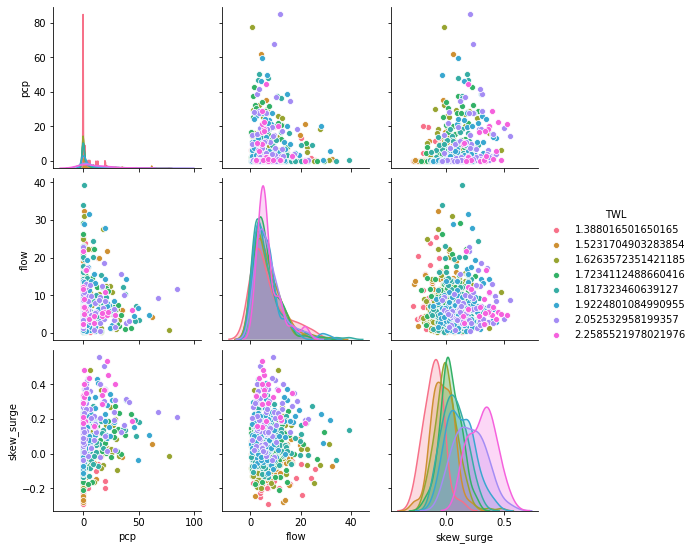

In [ ]:
fraction_of_data = data_vis.sample(frac=0.05)
#fraction_of_data = data.sample(frac=0.1)

import matplotlib.pyplot as plt
import seaborn as sns
#sns.palplot(sns.color_palette("cubehelix", 8))
sns.set_palette("PuBuGn_d")
sns.pairplot(fraction_of_data,hue='TWL')


In [ ]:

danger = [1 if x>0.85*TWL.max() else 0 for x in TWL]

cross color in the following graph shows the high water level (more than 0.85% of the max(TWL)

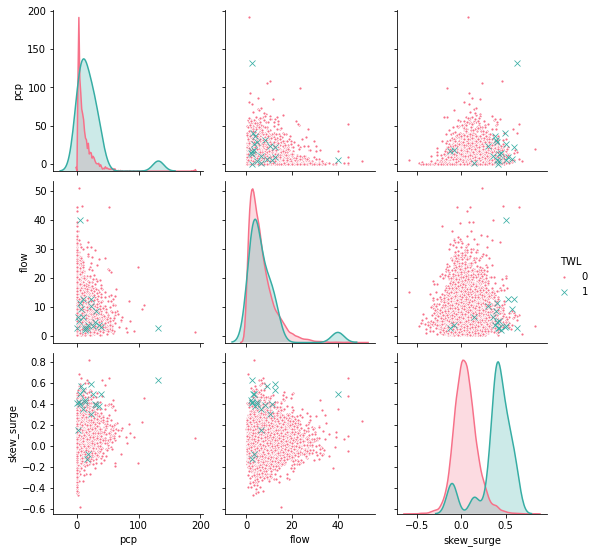

In [ ]:
data_vis.TWL = danger
fraction_of_data = data_vis.sample(frac=0.5)
#fraction_of_data = data.sample(frac=0.1)

import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(fraction_of_data,hue='TWL', markers=[".", "x"], palette="husl")

#"When Total Water Level is 0.85 percent of its Maximum")


Text(0.5, 1.0, 'When Total Water Level is 0.85 percent of its Maximum')

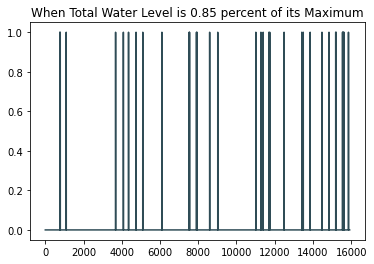

In [ ]:
plt.plot(danger)
plt.title('When Total Water Level is 0.85 percent of its Maximum')

# Normalization

In [ ]:
data =(data-data.min())/(data.max()-data.min())
data=(data-data.mean())/data.std()

# Test-Train-Cv

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#X = [train.pcp, train.flow,train.skew_surge]
#y = train.TWL

X = data.iloc[:, 0:3].values
y = data.iloc[:, 3].values
y_class = np.array(danger)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.6, random_state=0)
#X_train, X_cros, y_train, y_cross = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

#  Feature Scaling

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Training the Algorithm

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=5, random_state=42)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

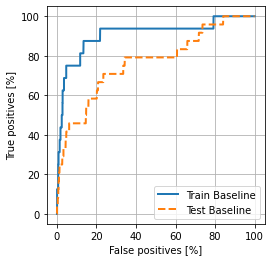

In [ ]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

from sklearn.metrics import roc_curve
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)
  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  #plt.xlim([-0.5,20])
  #plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

plot_roc("Train Baseline", y_train_class, y_train_pred)
plot_roc("Test Baseline", y_test_class, y_test_pred, linestyle='--')
plt.legend(loc='lower right')

# Evaluating the Algorithm

In [ ]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.05899043177316382
Mean Squared Error: 0.006252640901407447
Root Mean Squared Error: 0.07907364226724002


# SVM regression

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

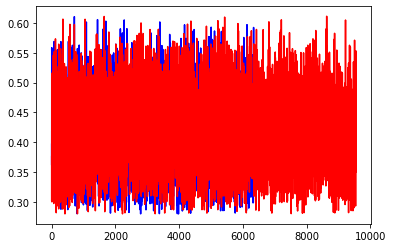

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_train_pred ,'b')
plt.plot(y_test_pred,'r')
#plt.plot(np.abs(y_test-y_test_pred),'r')
#plt.plot(np.abs(y_train_pred-y_train))

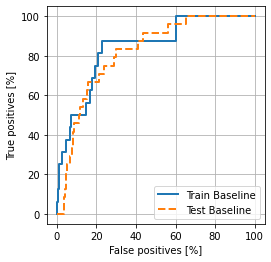

In [ ]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

from sklearn.metrics import roc_curve
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)
  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  #plt.xlim([-0.5,20])
  #plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

plot_roc("Train Baseline", y_train_class, y_train_pred)
plot_roc("Test Baseline", y_test_class, y_test_pred, linestyle='--')
plt.legend(loc='lower right')

# Deep Learning

In [ ]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.regularizers import l1_l2
from keras.layers import Dropout

visible = Input(shape=(3,))
hidden1 = Dense(5, activation='relu')(visible)
hidden1 = Dropout(0.5)(hidden1)
hidden2 = Dense(10, activation='relu',activity_regularizer=l1_l2(l1=0.01, l2=0.01))(hidden1)
hidden2 = Dropout(0.5)(hidden2)

hidden2 = Dense(10, activation='relu',activity_regularizer=l1_l2(l1=0.01, l2=0.01))(hidden1)
hidden2 = Dropout(0.5)(hidden2)

hidden2 = Dense(10, activation='relu',activity_regularizer=l1_l2(l1=0.01, l2=0.01))(hidden1)
hidden2 = Dropout(0.5)(hidden2)

hidden3 = Dense(5, activation='relu',activity_regularizer=l1_l2(l1=0.01, l2=0.01))(hidden2)
hidden3 = Dropout(0.5)(hidden3)

hidden3 = Dense(3, activation='linear',activity_regularizer=l1_l2(l1=0.01, l2=0.01))(hidden2)
hidden3 = Dropout(0.5)(hidden3)

output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 20        
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                60        
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
_________________________________________________________________
dropout_5 (Dropout)          (None, 3)                

In [ ]:
modelff = Model(inputs=visible, outputs=output)

In [ ]:
# compile the keras model
from keras.optimizers import SGD
opt = SGD()
modelff.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset without progress bars
modelff.fit(X_train, y_train_class, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
6368/6368 [==============================] - 5s 851us/step - loss: 0.0838 - accuracy: 0.9959
Epoch 2/50
6368/6368 [==============================] - 5s 815us/step - loss: 0.0345 - accuracy: 0.9975
Epoch 3/50
6368/6368 [==============================] - 6s 898us/step - loss: 0.0264 - accuracy: 0.9975
Epoch 4/50
6368/6368 [==============================] - 6s 970us/step - loss: 0.0219 - accuracy: 0.9975
Epoch 5/50
6368/6368 [==============================] - 5s 850us/step - loss: 0.0199 - accuracy: 0.9975
Epoch 6/50
6368/6368 [==============================] - 5s 855us/step - loss: 0.0189 - accuracy: 0.9975
Epoch 7/50
6368/6368 [==============================] - 6s 868us/step - loss: 0.0184 - accuracy: 0.9975
Epoch 8/50
6368/6368 [==============================] - 5s 862us/step - loss: 0.0181 - accuracy: 0.9975
Epoch 9/50
6368/6368 [==============================] - 5s 828us/step - loss: 0.0180 - accuracy: 0.9975
Epoch 10/50
6368/6368 [==============================] - 6s 886u

In [ ]:
# evaluate the keras model
_, accuracy = modelff.evaluate(X_test, y_test_class , verbose=1)

299/299 [==============================] - 0s 961us/step - loss: 0.0178 - accuracy: 0.9975


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

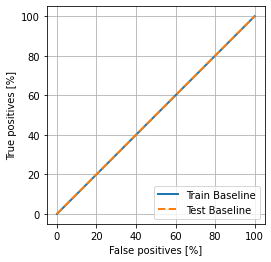

In [ ]:
from sklearn.metrics import roc_curve
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  #plt.xlim([-0.5,20])
  #plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

plot_roc("Train Baseline", y_train_class, y_train_pred)
plot_roc("Test Baseline", y_test_class, y_test_pred, linestyle='--')
plt.legend(loc='lower right')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.723


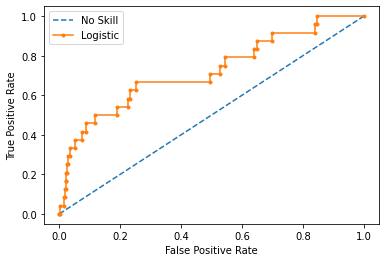

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# predict probabilities

#y_train_pred = regr.predict(X_train)
#y_test_pred = regr.predict(X_test)

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train_class)
# predict probabilities
lr_probs = model.predict_proba(X_test)

ns_probs = [0 for _ in range(len(y_test_class))]

# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_class, ns_probs)
lr_auc = roc_auc_score(y_test_class, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_class, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_class, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()